<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Lab</h1>
</div>

For this lab, we'll be using the `flights.txt` file located in `/datasets`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Part 1**

Open `../datasets/flights.txt`. Use the methods we've learned in class to analyze the dataset from the top-level (see how many rows it has, how many null values, what columns are necessary, etc.).

**a.** read the file into a dataframe (hint: as a csv)

In [3]:
#help(pd.read_csv)

In [4]:
df = pd.read_csv("../datasets/flights.txt", sep='|')  #csv files are normally separated by comma, not |, this is a  txt so we need to pass | as an arg
df

,Unnamed: 0,Unnamed: 0.1,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,...,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,0,0,2013,1,1,517.0,515,2.0,830.0,819,...,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,1,1,2013,1,1,533.0,529,4.0,850.0,830,...,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2,2,2013,1,1,542.0,540,2.0,923.0,850,...,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,...,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,4,4,2013,1,1,554.0,600,-6.0,812.0,837,...,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,99995,2013,12,19,814.0,817,-3.0,920.0,931,...,EV,4234,N25134,EWR,BWI,40.0,169,8,17,2013-12-19T13:00:00Z
99996,99996,99996,2013,12,19,815.0,810,5.0,1033.0,1047,...,9E,3741,N293PQ,LGA,MCI,172.0,1107,8,10,2013-12-19T13:00:00Z
99997,99997,99997,2013,12,19,815.0,815,0.0,1117.0,1123,...,B6,281,N298JB,JFK,HOU,216.0,1428,8,15,2013-12-19T13:00:00Z
99998,99998,99998,2013,12,19,815.0,749,26.0,1113.0,1103,...,UA,623,N504UA,EWR,SAN,337.0,2425,7,49,2013-12-19T12:00:00Z


**b.** Find the memory usage programmatically (hint: use `help`)

In [5]:
#help(df.info)

In [6]:
mem = df.memory_usage().sum() / 1000000    #divide by a million to get the MBs 

f"The total memory used is {mem} MB"

'The total memory used is 16.800128 MB'

**c.** Find the number of missing entries for each column.

In [7]:
df.isna().sum()  #these are the total missing values for each column

Unnamed: 0           0
Unnamed: 0.1         0
year                 0
month                0
day                  0
dep_time          1894
sched_dep_time       0
dep_delay         1894
arr_time          1964
sched_arr_time       0
arr_delay         2146
carrier              0
flight               0
tailnum            547
origin               0
dest                 0
air_time          2146
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

**d.** What columns are unnecessary? Remove them so that the `df` doesn't include them.

In [8]:
#It looks like Unnamed 0 and Unnamed 0.1 are not necessary

del df['Unnamed: 0']   #or is it better to use the drop method? df.drop(columns=['Unnamed: 0','Unnamed: 0.1'], axis = 1)

In [9]:
del df["Unnamed: 0.1"]

In [10]:
df   #maybe also remove the last one time_hour???

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013,12,19,814.0,817,-3.0,920.0,931,-11.0,EV,4234,N25134,EWR,BWI,40.0,169,8,17,2013-12-19T13:00:00Z
99996,2013,12,19,815.0,810,5.0,1033.0,1047,-14.0,9E,3741,N293PQ,LGA,MCI,172.0,1107,8,10,2013-12-19T13:00:00Z
99997,2013,12,19,815.0,815,0.0,1117.0,1123,-6.0,B6,281,N298JB,JFK,HOU,216.0,1428,8,15,2013-12-19T13:00:00Z
99998,2013,12,19,815.0,749,26.0,1113.0,1103,10.0,UA,623,N504UA,EWR,SAN,337.0,2425,7,49,2013-12-19T12:00:00Z


**e.** Carrier/airline information is located below. Use the information in there to create a new column with a human-readable airline name.

```
"9E" "Endeavor Air Inc.",
"AA" "American Airlines Inc.",
"AS" "Alaska Airlines Inc.",
"B6" "JetBlue Airways",
"DL" "Delta Air Lines Inc.",
"EV" "ExpressJet Airlines Inc.",
"F9" "Frontier Airlines Inc.",
"FL" "AirTran Airways Corporation",
"HA" "Hawaiian Airlines Inc.",
"MQ" "Envoy Air",
"OO" "SkyWest Airlines Inc.",
"UA" "United Air Lines Inc.",
"US" "US Airways Inc.",
"VX" "Virgin America",
"WN" "Southwest Airlines Co.",
"YV" "Mesa Airlines Inc.",

```

In [11]:
carrier_mapping = {"9E": "Endeavor Air Inc.",
"AA": "American Airlines Inc.",
"AS":"Alaska Airlines Inc.",
"B6": "JetBlue Airways",
"DL": "Delta Air Lines Inc.",
"EV": "ExpressJet Airlines Inc.",
"F9": "Frontier Airlines Inc.",
"FL": "AirTran Airways Corporation",
"HA": "Hawaiian Airlines Inc.",
"MQ": "Envoy Air",
"OO": "SkyWest Airlines Inc.",
"UA": "United Air Lines Inc.",
"US": "US Airways Inc.",
"VX": "Virgin America",
"WN": "Southwest Airlines Co.",
"YV": "Mesa Airlines Inc."}

In [12]:
carrier_mapping

{'9E': 'Endeavor Air Inc.',
 'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'ExpressJet Airlines Inc.',
 'F9': 'Frontier Airlines Inc.',
 'FL': 'AirTran Airways Corporation',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'Envoy Air',
 'OO': 'SkyWest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'US': 'US Airways Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.',
 'YV': 'Mesa Airlines Inc.'}

In [13]:

df["carrier"] = df["carrier"].replace(carrier_mapping)

In [14]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,United Air Lines Inc.,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,United Air Lines Inc.,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,American Airlines Inc.,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,JetBlue Airways,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,Delta Air Lines Inc.,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2013,12,19,814.0,817,-3.0,920.0,931,-11.0,ExpressJet Airlines Inc.,4234,N25134,EWR,BWI,40.0,169,8,17,2013-12-19T13:00:00Z
99996,2013,12,19,815.0,810,5.0,1033.0,1047,-14.0,Endeavor Air Inc.,3741,N293PQ,LGA,MCI,172.0,1107,8,10,2013-12-19T13:00:00Z
99997,2013,12,19,815.0,815,0.0,1117.0,1123,-6.0,JetBlue Airways,281,N298JB,JFK,HOU,216.0,1428,8,15,2013-12-19T13:00:00Z
99998,2013,12,19,815.0,749,26.0,1113.0,1103,10.0,United Air Lines Inc.,623,N504UA,EWR,SAN,337.0,2425,7,49,2013-12-19T12:00:00Z


In [15]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

**Part 2** 

Now we need to fix the missing rows and values.



**a.** Check out the rows missing values for "dep_delay". Can we keep them? If not, remove those rows.

(note: we're only interested in rows with flight time information)

In [16]:
df = df[~df.dep_delay.isna()].reset_index(drop=True)     #negating  #dropping the empty dep_delay

In [17]:
df

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,United Air Lines Inc.,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,United Air Lines Inc.,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,American Airlines Inc.,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,JetBlue Airways,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,Delta Air Lines Inc.,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98101,2013,12,19,814.0,817,-3.0,920.0,931,-11.0,ExpressJet Airlines Inc.,4234,N25134,EWR,BWI,40.0,169,8,17,2013-12-19T13:00:00Z
98102,2013,12,19,815.0,810,5.0,1033.0,1047,-14.0,Endeavor Air Inc.,3741,N293PQ,LGA,MCI,172.0,1107,8,10,2013-12-19T13:00:00Z
98103,2013,12,19,815.0,815,0.0,1117.0,1123,-6.0,JetBlue Airways,281,N298JB,JFK,HOU,216.0,1428,8,15,2013-12-19T13:00:00Z
98104,2013,12,19,815.0,749,26.0,1113.0,1103,10.0,United Air Lines Inc.,623,N504UA,EWR,SAN,337.0,2425,7,49,2013-12-19T12:00:00Z


**b.** Now check out the rows missing "arr_time". Can we keep them? Drop them if not.

In [18]:
df = df[~df.arr_time.isna()].reset_index(drop=True)  #dropping the empty ones
#ca also do-->   #df.dropna(subset=["arr_time"],inplace=True)

**c.** Now let's check out the rows missing `air_time`. Can we keep them? Drop them if not.

In [19]:
df = df[~df.air_time.isna()].reset_index(drop=True)  #dropping the empty ones

In [20]:
df.isna().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
dtype: int64

**Part 3**

Making observations of what we have.

**a.** What flight was the longest? Where did it leave from and where did it land?

You might need to look up airport codes.

In [21]:
df.groupby("distance")[["origin","dest"]].max().sort_values("distance",ascending=False)
#the longest flight was from JFK(New York) to HNL(Honolulu) :4983

,origin,dest
distance,,
4983,JFK,HNL
4963,EWR,HNL
2586,JFK,SFO
2576,JFK,OAK
2569,JFK,SJC
...,...,...
143,EWR,ALB
116,EWR,BDL
96,LGA,PHL


**b.** What flight was the shortest?

In [22]:
#from the previous question we can see that the shortes flight was from EWR(New Jersey) to PHL(Philadelphia) :80

**c.** What airline flied the most during this period?

hint: `.size()`

In [23]:
df.groupby("carrier")[["distance"]].sum().sort_values("distance",ascending=False)
#United Air Lines Inc. flew the most

,distance
carrier,
United Air Lines Inc.,26238580
Delta Air Lines Inc.,17065650
JetBlue Airways,16745433
American Airlines Inc.,12793400
ExpressJet Airlines Inc.,8697373
Envoy Air,4332239
Virgin America,3727028
Southwest Airlines Co.,3697930
US Airways Inc.,3345125


In [24]:
df[df["carrier"]  == "United Air Lines Inc."]["distance"].sum()  #double checking

26238580

**d.** Which destination was most flown to?

In [25]:
df["dest"].value_counts()
#Most flown to destination was ATL (Atlanta) - flown to 5036 times during our df period

ATL    5036
ORD    4908
LAX    4689
BOS    4511
CLT    4165
       ... 
HDN       4
BZN       4
JAC       2
LEX       1
EYW       1
Name: dest, Length: 101, dtype: int64

**e.** Which location was flown from the most?

In [26]:
df["origin"].value_counts()
#Most flown from origin was EWR (Newark, NJ) - flown from 34766 times during our df period

EWR    34766
JFK    31855
LGA    31233
Name: origin, dtype: int64

**f.** Which flight had the longest departure delay?

In [27]:
df.groupby("flight")[["dep_delay"]].max().sort_values("dep_delay",ascending=False)


,dep_delay
flight,
51,1301.0
3695,1126.0
172,896.0
3944,853.0
1223,849.0
...,...
1877,-11.0
5614,-11.0
5623,-11.0


In [28]:
df[(df["flight"] == 51) &  (df['dep_delay'] == 1301.0)]
#The longerst departure delay was on flight 51 by Hawaiian Airlines Inc. - delay of 1301.0

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7008,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,Hawaiian Airlines Inc.,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09T14:00:00Z


In [29]:
#one line solution will be:
#df[df["dep_delay"]== df["dep_delay"].max()][["flight","dep_delay","carrier"]]

**g.** Which flight had the longest arrival delay? Should match the previous.

In [30]:
df.groupby("flight")[["arr_delay"]].max().sort_values("arr_delay",ascending=False)

,arr_delay
flight,
51,1272.0
3695,1109.0
172,878.0
2391,856.0
3944,851.0
...,...
4285,-36.0
4953,-36.0
5213,-37.0


In [31]:
df[(df["flight"] == 51) &  (df['arr_delay'] == 1272.0)]
#same - flight 51 by Hawaiian Airlines Inc.	

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7008,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,Hawaiian Airlines Inc.,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09T14:00:00Z


**h.** Which airline had the longest arrival delays on average?

In [32]:
df.groupby(["carrier"])["arr_delay"].mean().sort_values(ascending=False)
# Frontier Airlines Inc. -  20.584906

carrier
Frontier Airlines Inc.         20.584906
SkyWest Airlines Inc.          17.000000
AirTran Airways Corporation    15.779932
ExpressJet Airlines Inc.       14.980682
Mesa Airlines Inc.              9.900585
Southwest Airlines Co.          9.493562
Envoy Air                       7.398040
Hawaiian Airlines Inc.          6.576087
Endeavor Air Inc.               5.543343
JetBlue Airways                 3.676695
United Air Lines Inc.           2.837953
American Airlines Inc.          0.574529
US Airways Inc.                 0.089570
Delta Air Lines Inc.           -2.019436
Virgin America                 -2.390342
Alaska Airlines Inc.           -5.487805
Name: arr_delay, dtype: float64

**i.** Which airline had the longest departure delays on average?

In [33]:
df.groupby(["carrier"])["dep_delay"].mean().sort_values(ascending=False)
#ExpressJet Airlines Inc. - 17.247771

carrier
ExpressJet Airlines Inc.       17.247771
Hawaiian Airlines Inc.         15.380435
Mesa Airlines Inc.             14.497076
Southwest Airlines Co.         13.828594
AirTran Airways Corporation    13.591790
Frontier Airlines Inc.         13.169811
Endeavor Air Inc.              12.787626
SkyWest Airlines Inc.          11.833333
United Air Lines Inc.           8.410304
JetBlue Airways                 7.191641
Alaska Airlines Inc.            6.390244
Envoy Air                       6.000927
American Airlines Inc.          5.910039
Virgin America                  5.119383
Delta Air Lines Inc.            4.813562
US Airways Inc.                 1.513079
Name: dep_delay, dtype: float64

**j.** Which aircraft (going by tailnumber) flew the most?

In [34]:
#i have 2 answers, by interpreting the question in 2 different ways-->
df.groupby("tailnum")[["distance"]].sum().sort_values("distance",ascending=False)     ## flew the most total distance
## N328AA	297322

,distance
tailnum,
N328AA,297322
N338AA,274497
N327AA,271911
N339AA,269607
N512UA,258000
...,...
N8631E,264
N746SK,229
N505SW,185


In [35]:
df["tailnum"].value_counts().sort_values(ascending=False)   #flew the most times
##N0EGMQ - 149 times

N0EGMQ    149
N183JB    133
N307JB    128
N542MQ    126
N353JB    126
         ... 
N961DN      1
N519US      1
N360SW      1
N821AY      1
N509SW      1
Name: tailnum, Length: 3733, dtype: int64

**Bonus:** What day had the most flights?

In [36]:
df["day"].value_counts()
#the most flights occured on the 18th and the 4th

18    3813
4     3813
11    3774
3     3755
1     3706
13    3641
8     3636
15    3632
6     3611
17    3607
2     3576
10    3534
16    3488
7     3487
9     3473
14    3449
12    3276
5     3173
21    2882
22    2837
25    2799
24    2780
27    2689
20    2669
30    2619
23    2598
19    2490
29    2486
28    2470
26    2334
31    1757
Name: day, dtype: int64

**Part 4**

Using one (or more) of the exercises from **Part 3**, plot the information in a matplotlib chart that has correct ticks, labels, titles and axis. Also ensure that the chart type that you use is the correct one for plotting the data you're using. Create a chart you would proudly show an employer.

[Text(0, 0.5, 'Airline'),
 (1000.0, 26500000.0),
 Text(0.5, 0, 'Distance'),
 Text(0.5, 1.0, 'Airlines that flew the most total miles')]

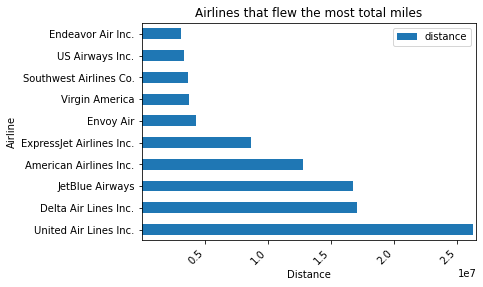

In [105]:
ax = df.groupby("carrier")[["distance"]].sum().sort_values("distance",ascending=False).iloc[:10].plot.barh()
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, horizontalalignment='right')
ax.set(xlim=[1000, 26500000], xlabel='Distance', ylabel='Airline',
       title='Airlines that flew the most total miles')    #need to better adjust the numbers on x axis

Text(0, 0.5, 'Times it was flown to')

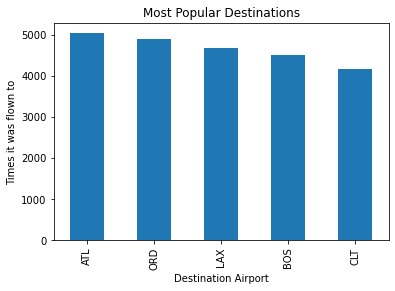

In [122]:
df["dest"].value_counts().iloc[:5].plot.bar()
plt.title('Most Popular Destinations')
plt.xlabel('Destination Airport')
plt.ylabel('Times it was flown to')


[Text(0, 0.5, 'Airline'),
 (1.0, 18.0),
 Text(0.5, 0, 'Distance'),
 Text(0.5, 1.0, 'Airlines with most delays on average')]

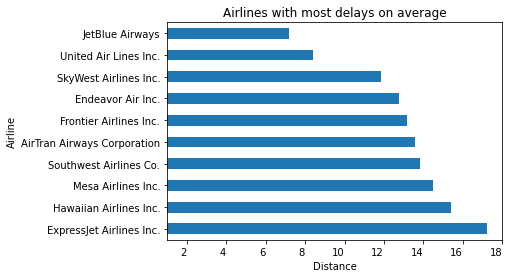

In [119]:
ax= df.groupby(["carrier"])["dep_delay"].mean().sort_values(ascending=False).iloc[:10].plot.barh()
labels = ax.get_xticklabels()
plt.setp(labels,rotation=0, horizontalalignment='right')
ax.set(xlim=[1, 18], xlabel='Distance', ylabel='Airline',
       title='Airlines with most delays on average') 